In [14]:
from summary import create_summary
import pandas as pd

df, avg, std = create_summary("")

<Axes: >

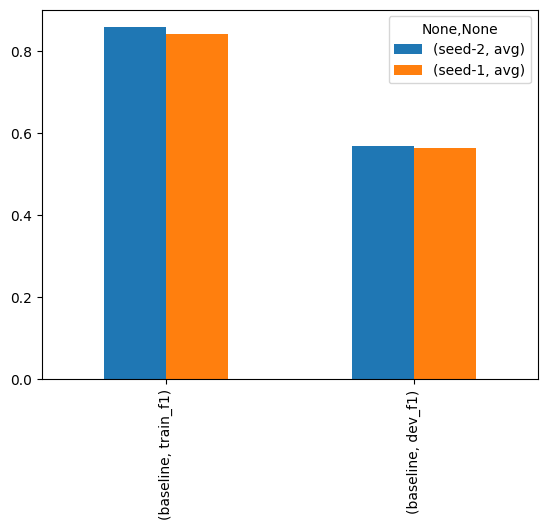

In [15]:
idx = pd.IndexSlice
df.loc[:, idx[:, "avg"]].plot(kind="bar")

In [ ]:
import seaborn as sns

fg = sns.catplot()